# 삼각격자 원형으로 구현

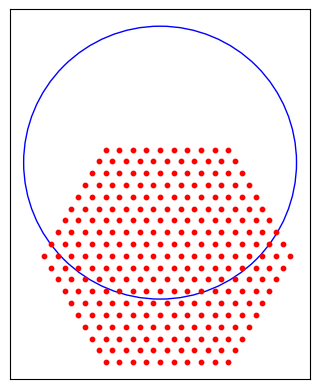

In [ ]:
# 기록해서 가져와서 사용할라고 
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
# 세로
h = 100
# 가로
w = 200
# make triangular lattice
G = nx.triangular_lattice_graph(m=h, n=w, periodic=False, with_positions=True, create_using=None)
pos = nx.get_node_attributes(G, 'pos')

center =(h//2+1, h//2+1)
radius=10
fig, ax = plt.subplots()

circle = Circle(center, radius, fill=False, edgecolor='blue')
ax.add_patch(circle)
circle_node = []

for i in G.nodes:
    if nx.shortest_path_length(G, source=center, target=i)<radius:
        circle_node.append(i)

nx.draw_networkx_nodes(G, pos, nodelist=circle_node, node_size=10, node_color='red')
ax.set_aspect('equal')
# H = nx.subgraph(G, circle_node)
# nx.draw(H, pos)
# nx.write_edgelist(G, '../data/gdata.edgelist')

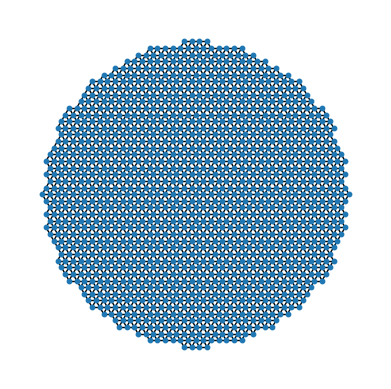

In [ ]:
h = 100
# 가로
w = 200
# make triangular lattice
G = nx.triangular_lattice_graph(m=h, n=w, periodic=False, with_positions=True, create_using=None)
pos = nx.get_node_attributes(G, 'pos')


# center 노드랑 그 노드의 위치 정보
center =(h//2+1, h//2+1)
center_pos = G.nodes[center]['pos']


# 우리가 선택할 원형이내에 들어오는 노드
circle_nodes = set()
# 기준점
radius = 20

for node, poss in pos.items():
    distance = math.sqrt((poss[0] - center_pos[0])**2 + (poss[1] - center_pos[1])**2)
    if distance <= radius:
        circle_nodes |= {node}

fig, ax = plt.subplots()


# circle = Circle(center, radius, fill=False, edgecolor='blue')
# ax.add_patch(circle)
ax.set_aspect('equal')

H = nx.subgraph(G, circle_nodes)
nx.draw(H,pos, node_size=10)
# nx.draw_networkx_nodes(G, pos, nodelist=circle_nodes, node_size=10, node_color='red')

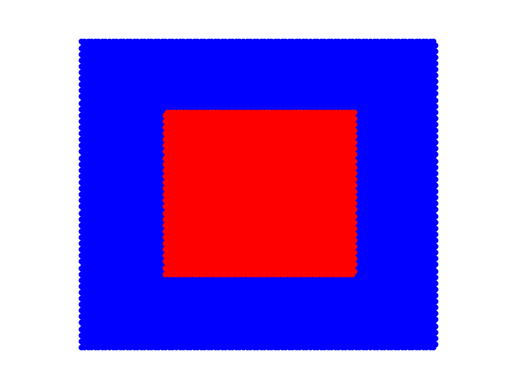

In [ ]:
center = (h//2, h//2)
infection = set()

# # initial node를 어떻게 고를거냐 이방법은 생각보다 오래걸릴거 같기도?
# for i in G.nodes:
#     if nx.shortest_path_length(G, source=center, target=i) < 27:
#             infection |= {i}

for i in range(h//2+1 -27 , h//2+1+27):
    for j in range(h//2+1 -27 , h//2+1+27):
        infection |= {(i,j)}

plt.figure()
plt.axis('equal')
nx.draw(G, pos, node_size=10, node_color='blue', with_labels=False)
nx.draw_networkx_nodes(G, pos, nodelist=infection, node_size=10, node_color='red')